<a href="https://colab.research.google.com/github/guptaprateek98/Capstone_CV_Risk_Prediction/blob/main/Capstone_CV_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###*The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.*

###**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

##**Data Description**

##Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

##Behavioral:

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##Medical( history):

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke 
(Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

##Medical(current):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

##Predict variable (desired target):

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir())


['.config', 'drive', 'sample_data']


In [2]:
# mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataf = pd.read_csv("/content/drive/MyDrive/CV_Risk_Prediction/data_cardiovascular_risk.csv") 

In [4]:
dataf.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
dataf.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Here std's for all the features 

In [6]:
dataf.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [7]:
# dropping the missing value.
dataf = dataf.dropna(how = "any")

In [8]:
dataf.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
# Checking for the duplicate values
len(dataf[dataf.duplicated()])

0

In [10]:
#here 'id' and 'education' features are irrelevent w.r.t. Heart Problem 
#removing 'id' and 'education' features from dataset
dataf.drop(['id', 'education'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
dataf.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


###Renaming of targer variable

In [12]:
dataf = dataf.rename(columns={'TenYearCHD':'Heart_Disease'})

# **Exploratory Data Analysis**

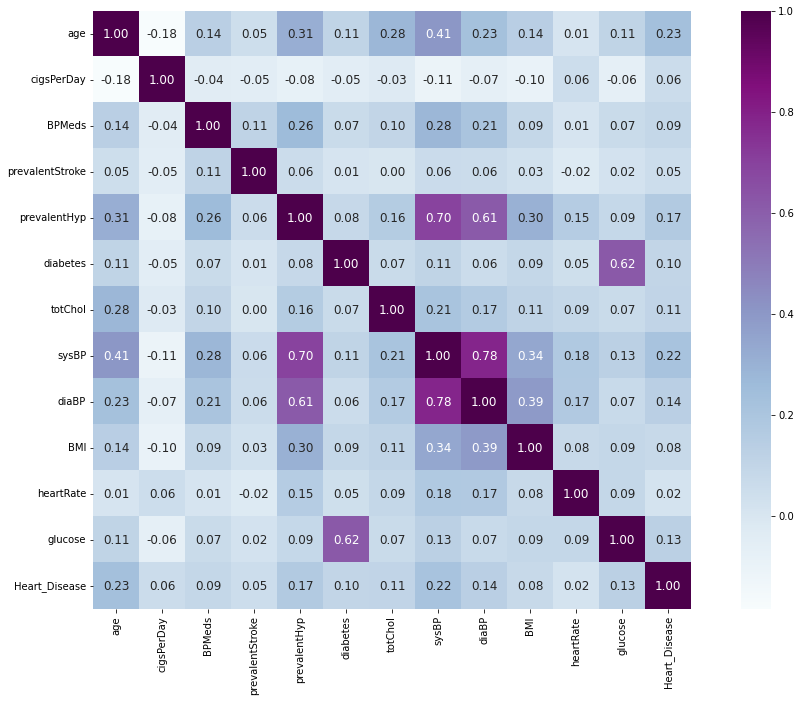

In [13]:
# ploting heat map finding correlation between columns
cdf = dataf.corr()

plt.subplots(figsize=(18, 11))
sns.heatmap(cdf,annot = True, cmap="BuPu",fmt='.2f', annot_kws={'size': 12},  vmax=1, square=True);

**Here sysBP and DiaBP are correlated so dealing with them**

In [14]:
# Combining systolic and diastolic blood pressure column through formula 
dataf['map']=round((dataf['sysBP']+2*dataf['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column


In [15]:
# droping systolic and diastolic blood pressure column
dataf.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [16]:
# droping is_smoking and prevalentHyp columns
dataf.drop(['is_smoking','prevalentHyp'],axis=1, inplace=True)

In [17]:
# Numerical variables
numerical = [var for var in dataf.columns if var not in ['sex','BPMeds','is_smoking','diabetes','prevalentStroke','prevalentHyp','Heart_Disease']]
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 7 numerical variables
['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'map']


In [18]:
pd.DataFrame(dataf[numerical]).describe()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,map
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,49.507345,9.112743,237.129142,25.797041,75.888282,81.934404,99.479612
std,8.597191,11.882784,44.613282,4.130376,11.971207,24.106943,14.633715
min,32.000000,0.000000,113.000000,15.960000,45.000000,40.000000,62.500000
25%,42.000000,0.000000,206.000000,23.030000,68.000000,71.000000,89.333000
50%,49.000000,0.000000,234.000000,25.380000,75.000000,78.000000,97.667000
75%,56.000000,20.000000,264.000000,28.040000,83.000000,87.000000,107.000000
max,70.000000,70.000000,600.000000,56.800000,143.000000,394.000000,188.333000


**Here we can see that std's for 'cigsprday' is higher than its mean, also max values and upper quertile of all other features (except age) has large differences which are showing that there are outliers present in dataset**

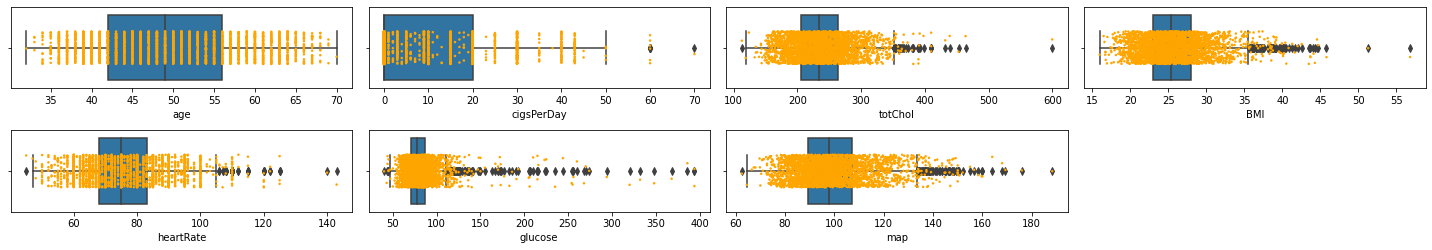

In [19]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(dataf[col])
    sns.stripplot(dataf[col], color="orange", jitter=0.2, size=2.5)

    num_it+=1
    
plt.tight_layout()

In [20]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
for col in numerical:
  upper_lim = dataf[col].quantile(.95)
  lower_lim = dataf[col].quantile(.05)
  dataf.loc[(dataf[col] > upper_lim),col] = upper_lim
  dataf.loc[(dataf[col] < lower_lim),col] = lower_lim

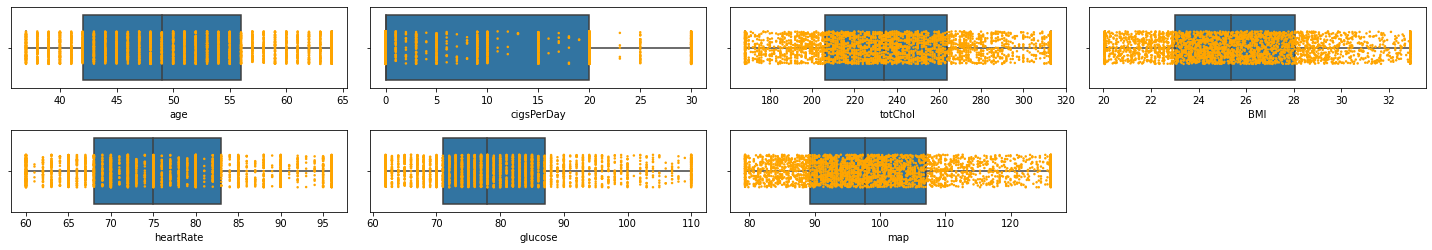

In [21]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(dataf[col])
    sns.stripplot(dataf[col], color="orange", jitter=0.2, size=2.5)

    num_it+=1
    
plt.tight_layout()

no outlier present

In [22]:
categorical = [var for var in dataf.columns if var not in numerical]
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 5 categorical variables
['sex', 'BPMeds', 'prevalentStroke', 'diabetes', 'Heart_Disease']


#Percentage of persons with heart problem out of total

0    2483
1     444
Name: Heart_Disease, dtype: int64


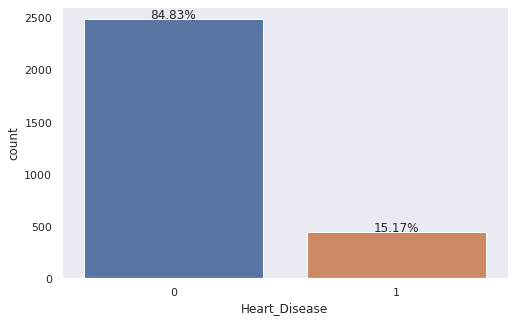

In [23]:
sns.set(style="dark")
plt.figure(figsize=(8,5))
  
ax = sns.countplot(dataf['Heart_Disease'])
target_temp = dataf['Heart_Disease'].value_counts()
  
total = float(len(dataf['Heart_Disease']))
# for showing the percentage
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height + 10,'{:.2f}%'.format(100*height/total), ha="center") 
print(target_temp)

#Univariate analysis of categorical variables

0    2848
1      79
Name: diabetes, dtype: int64


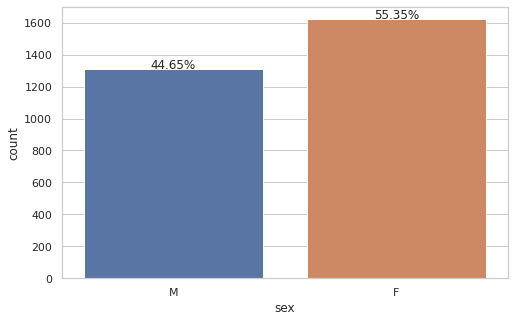

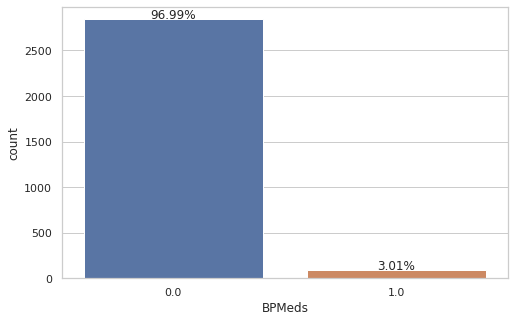

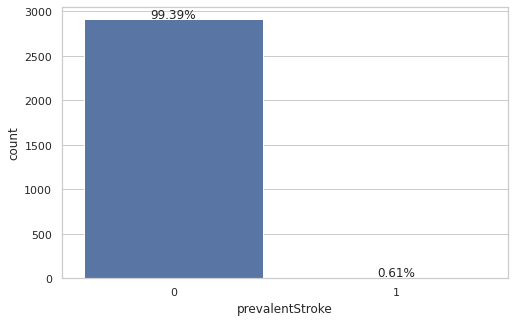

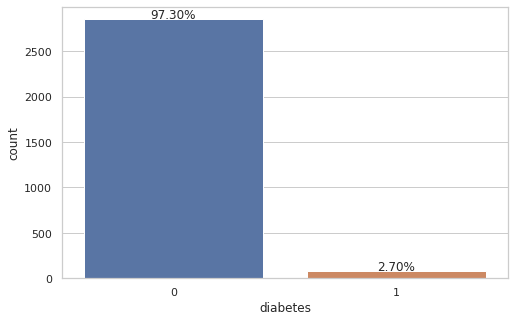

In [24]:
for i,j in enumerate(categorical[:-1]):
  sns.set(style="whitegrid")
  plt.figure(figsize=(8,5))
  
  ax = sns.countplot(dataf[j])
  target_temp = dataf[j].value_counts()
  
  total = float(len(dataf[j]))
  # for showing the percentage
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10,'{:.2f}%'.format(100*height/total), ha="center") 
print(target_temp)

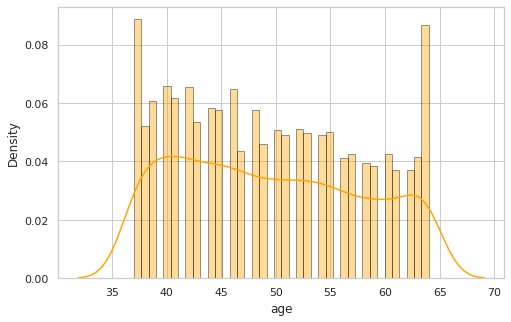

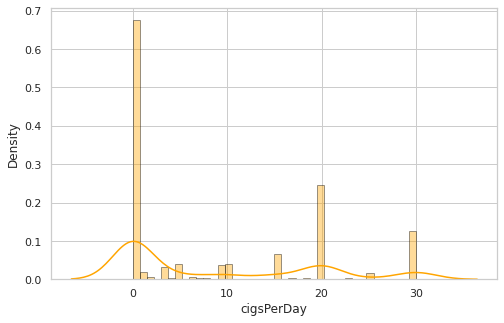

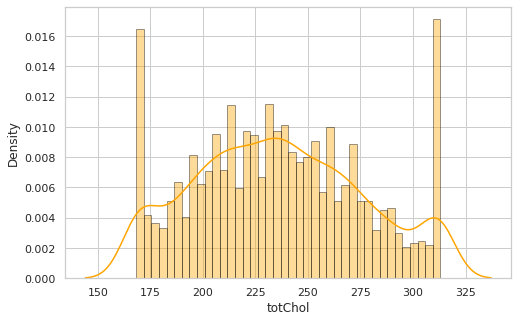

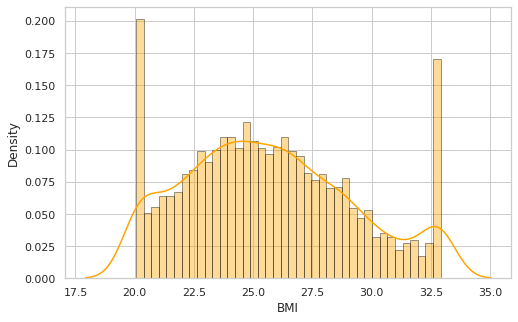

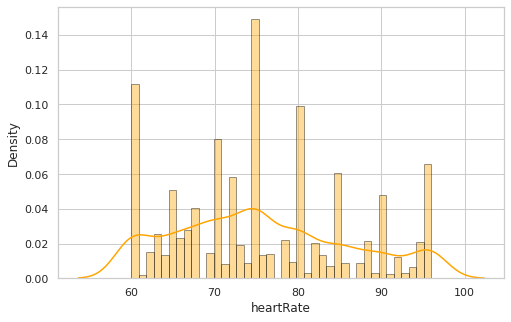

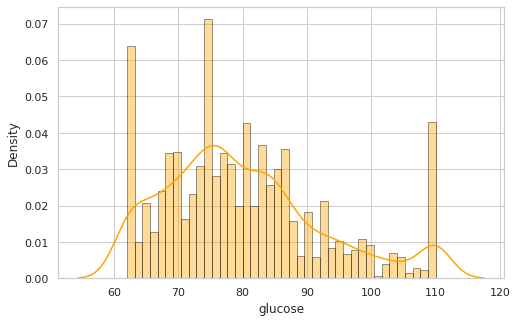

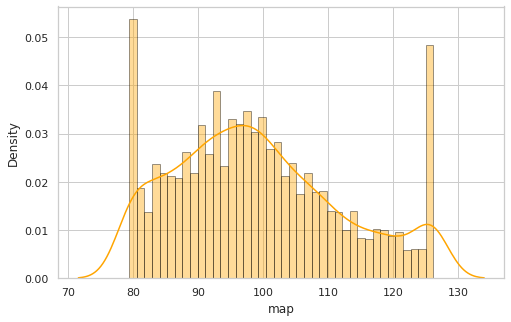

In [25]:
#Density Plot and Histogram of all arrival delays
for i,j in enumerate(numerical):
  plt.figure(figsize=(8,5))
  sns.distplot(a=dataf[j], bins=40, color='orange',
             hist_kws={"edgecolor": 'black'})
  plt.show()
 
# visualizing plot using matplotlib.pyplot library


In [26]:
categorical

['sex', 'BPMeds', 'prevalentStroke', 'diabetes', 'Heart_Disease']

In [27]:
numerical

['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'map']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

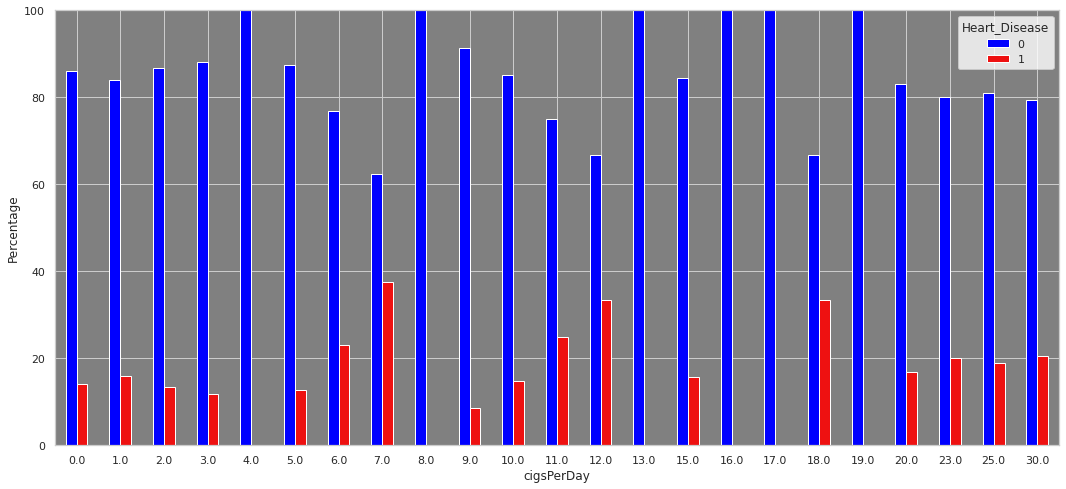

In [28]:
freq_df = dataf.groupby('Heart_Disease')['cigsPerDay'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar",figsize=(18,8),color=['blue','#EE1111' ]).set_facecolor('grey')
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

#Heart problem on the basis of Gender

In [34]:
pd.crosstab(dataf.sex,dataf.Heart_Disease)

Heart_Disease,0,1
sex,,
F,1417,203
M,1066,241


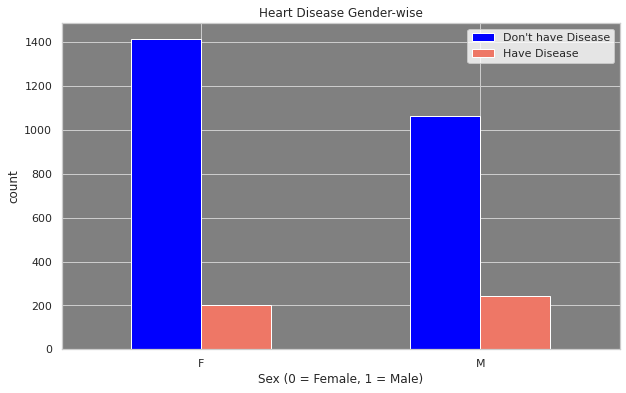

In [29]:

pd.crosstab(dataf.sex,dataf.Heart_Disease).plot(kind="bar",figsize=(10,6),color=['blue','#EE7766' ]).set_facecolor('grey')
plt.title('Heart Disease Gender-wise')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('count')
plt.show()

##Effect of BP Medicines on Heart

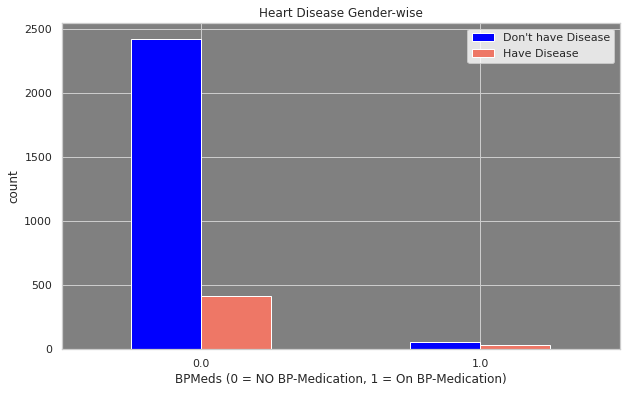

In [30]:
pd.crosstab(dataf.BPMeds,dataf.Heart_Disease).plot(kind="bar",figsize=(10,6),color=['blue','#EE7766' ]).set_facecolor('grey')
plt.title('Heart Disease Gender-wise')
plt.xlabel('BPMeds (0 = NO BP-Medication, 1 = On BP-Medication)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('count')
plt.show()

##Stroke effect on Heart

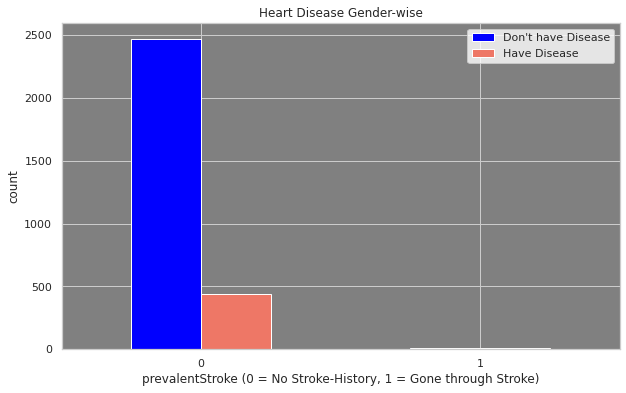

In [31]:
pd.crosstab(dataf.prevalentStroke,dataf.Heart_Disease).plot(kind="bar",figsize=(10,6),color=['blue','#EE7766' ]).set_facecolor('grey')
plt.title('Heart Disease Gender-wise')
plt.xlabel('prevalentStroke (0 = No Stroke-History, 1 = Gone through Stroke)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('count')
plt.show()

##Effect of age on heart problem

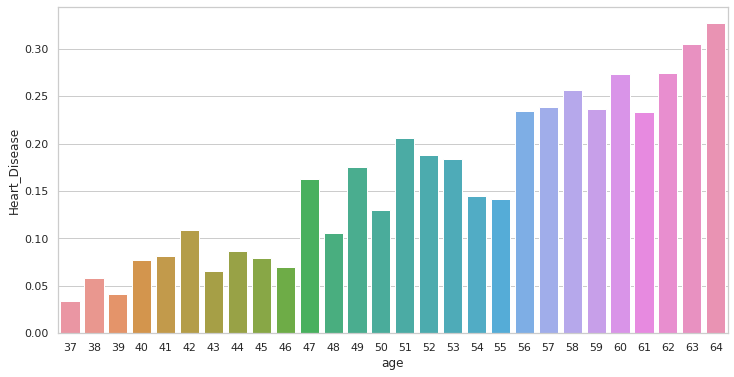

In [64]:
avg = dataf[["age", "Heart_Disease"]].groupby(['age'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
plt.figure(figsize=(12,6))
sns.barplot(x='age', y='Heart_Disease', data=avg)
ax.set(xlabel='age', ylabel='disease probability')

plt.show()

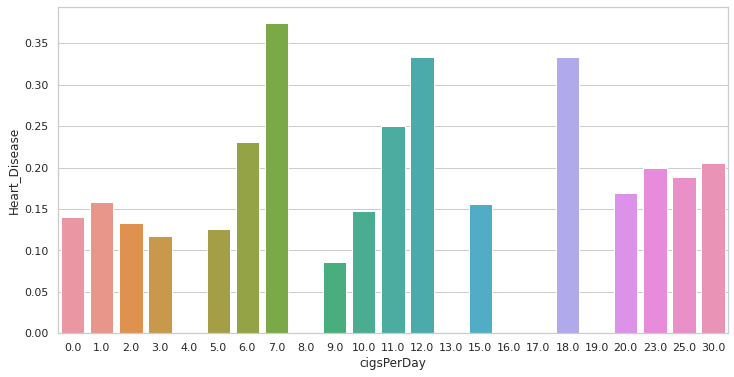

In [66]:
avg1 = dataf[["cigsPerDay", "Heart_Disease"]].groupby(['cigsPerDay'], as_index=False).mean()
plt.figure(figsize=(12,6))
sns.barplot(x='cigsPerDay', y='Heart_Disease', data=avg1)
ax.set(xlabel='cigsPerDay', ylabel='disease probability')

plt.show()

In [67]:
numerical

['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'map']

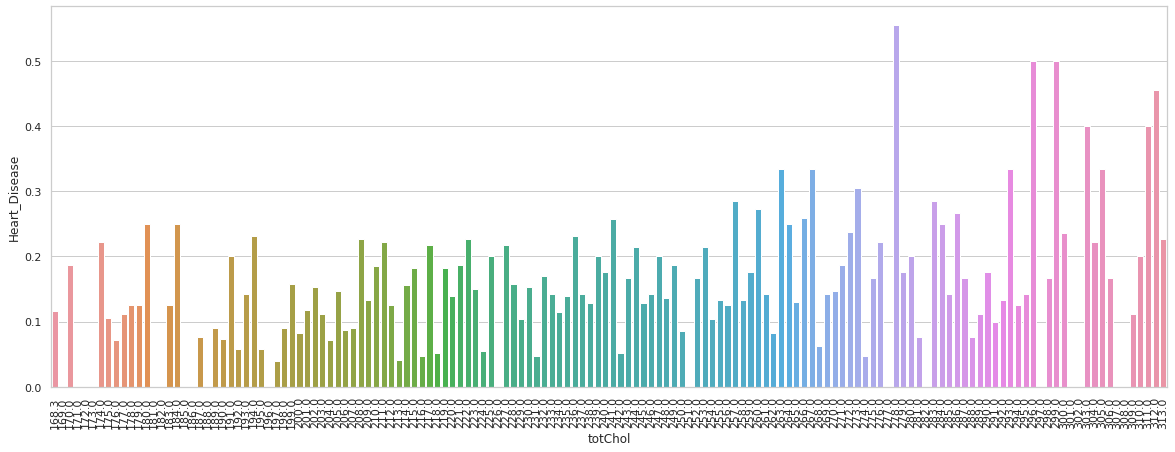

In [72]:
avg2 = dataf[["totChol", "Heart_Disease"]].groupby(['totChol'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
plt.figure(figsize=(20,7))
sns.barplot(x='totChol', y='Heart_Disease', data=avg2)
ax.set(xlabel='totChol', ylabel='disease probability')
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Relation between Temperature and Rental Bike Count')

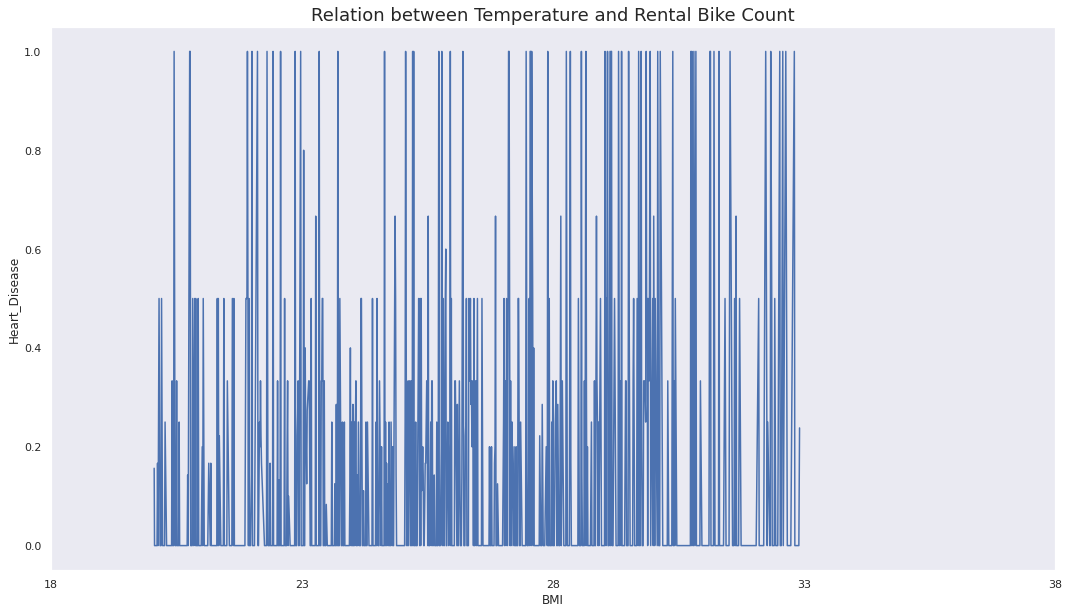

In [95]:
#avg3 = dataf[["BMI", "Heart_Disease"]].groupby(['BMI'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
#plt.figure(figsize=(12,6))
#sns.barplot(x='BMI', y='Heart_Disease', data=avg3)
#ax.set(xlabel='BMI', ylabel='disease probability')

#plt.show()

ds_t=dataf.groupby('BMI').agg({'Heart_Disease':'mean'}).reset_index()
plt.rcParams['figure.figsize'] = 18,10
sns.lineplot(ds_t['BMI'],ds_t['Heart_Disease'])
plt.xticks(np.arange(18, 40, 5))
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Heart_Disease',fontsize=12)
plt.title('Relation between Temperature and Rental Bike Count',fontsize=18)

In [ ]:
avg4 = dataf[["age", "Heart_Disease"]].groupby(['age'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
plt.figure(figsize=(12,6))
sns.barplot(x='age', y='Heart_Disease', data=avg)
ax.set(xlabel='age', ylabel='disease probability')

plt.show()

In [ ]:
avg5 = dataf[["age", "Heart_Disease"]].groupby(['age'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
plt.figure(figsize=(12,6))
sns.barplot(x='age', y='Heart_Disease', data=avg5)
ax.set(xlabel='age', ylabel='disease probability')

plt.show()